#  Process Ch. 7 ERF timeseries

Here we clean the ERF data from Ch. 7 following the data in https://github.com/chrisroadmap/ar6.

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path

import pandas as pd
import scmdata

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
OUT_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "chrisroadmap-ar6",
    "clean_erf_timeseries.nc",
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)
OUT_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/chrisroadmap-ar6/clean_erf_timeseries.nc'

<IPython.core.display.Javascript object>

In [5]:
filelist = [
    "ERF_ssp119_1750-2500.csv",
    "ERF_ssp126_1750-2500.csv",
    "ERF_ssp245_1750-2500.csv",
    "ERF_ssp370_1750-2500.csv",
    "ERF_ssp370-lowNTCF_1750-2500.csv",
    "ERF_ssp370-lowNTCFCH4_1750-2500.csv",
    "ERF_ssp434_1750-2500.csv",
    "ERF_ssp460_1750-2500.csv",
    "ERF_ssp534-over_1750-2500.csv",
    "ERF_ssp585_1750-2500.csv",
]

<IPython.core.display.Javascript object>

In [6]:
def variable_map(v):
    mapping = {
        "total_anthropogenic": "Effective Radiative Forcing|Anthropogenic",
        "co2": "Effective Radiative Forcing|Anthropogenic|CO2",
        "ch4": "Effective Radiative Forcing|Anthropogenic|CH4",
        "n2o": "Effective Radiative Forcing|Anthropogenic|N2O",
        "other_wmghg": "Effective Radiative Forcing|Anthropogenic|Other Greenhouse Gases",
        "total_natural": "Effective Radiative Forcing|Natural",
        "total": "Effective Radiative Forcing",
    }

    try:
        return mapping[v]
    except KeyError:
        return v

<IPython.core.display.Javascript object>

In [7]:
def read_smith_file(f):
    tmp = pd.read_csv(
        f"https://raw.githubusercontent.com/chrisroadmap/ar6/main/data_output/SSPs/{f}",
        index_col=0,
    )
    tmp.columns.name = "variable"
    tmp = tmp.T.reset_index()
    tmp["variable"] = tmp["variable"].map(variable_map)
    tmp["unit"] = "W / m^2"
    tmp["region"] = "World"
    tmp["model"] = "unspecified"
    tmp["scenario"] = os.path.basename(f).split("_")[1]

    return scmdata.ScmRun(tmp)

<IPython.core.display.Javascript object>

In [8]:
clean_db = scmdata.run_append(
    [read_smith_file(f) for f in filelist if "pc" not in f and "ssp334" not in f]
)
clean_db

<ScmRun (timeseries: 160, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	           model region scenario     unit  \
	0    unspecified  World   ssp119  W / m^2   
	1    unspecified  World   ssp119  W / m^2   
	2    unspecified  World   ssp119  W / m^2   
	3    unspecified  World   ssp119  W / m^2   
	4    unspecified  World   ssp119  W / m^2   
	..           ...    ...      ...      ...   
	155  unspecified  World   ssp585  W / m^2   
	156  unspecified  World   ssp585  W / m^2   
	157  unspecified  World   ssp585  W / m^2   
	158  unspecified  World   ssp585  W / m^2   
	159  unspecified  World   ssp585  W / m^2   
	
	                                              variable  
	0        Effective Radiative Forcing|Anthropogenic|CO2  
	1        Effective Radiative Forcing|Anthropogenic|CH4  
	2        Effective Radiative Forcing|Anthropogenic|N2O  
	3    Effective Radiative Forcing|Anthropogenic|Othe...  
	4                                            

<IPython.core.display.Javascript object>

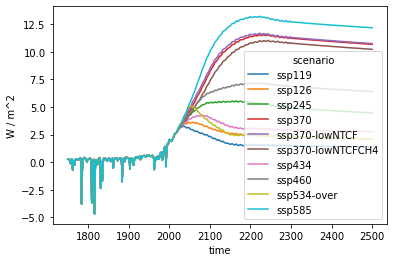

<IPython.core.display.Javascript object>

In [9]:
clean_db.filter(variable="Effective Radiative Forcing").lineplot()

In [10]:
clean_db.to_nc(OUT_FILE, dimensions=("scenario",))

<IPython.core.display.Javascript object>